# Cyber Security


## DESCRIPTION

## Problem Statement:

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

 

## Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.

 

## Project Task: Week 1

Exploratory Data Analysis:

Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

Determine the number of samples present in the data, unique elements in all the features. 

Check if there is any null value in any features. 

Correlation of features and feature selection:

Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

 

## Project Task: Week 2

Building Classification Model

Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.

Build classification models using a binary classifier to detect malicious or phishing URLs.

Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

Validate the accuracy of data by the K-Fold cross-validation technique.

The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

<center><h2 style="font-size:280%; font-family:Arial; background:green; color:white; border-radius:10px 10px; padding:10px;">Import necessary modules</h2></center>

In [133]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 999

# pre-processing
from sklearn.decomposition import PCA

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 


# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold

<center><h2 style="font-size:280%; font-family:Arial; background:green; color:white; border-radius:10px 10px; padding:10px;">Load Data</h2></center>

In [36]:
import os
for dirname, _, filenames in os.walk('.\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\input\dataset.csv


In [37]:
file=r'.\input\dataset.csv'

In [38]:
df=pd.read_csv(file,header=0)
print("Training Data has ", df.shape[0],"Rows and ",df.shape[1], "Columns", )

Training Data has  11055 Rows and  32 Columns


<center><h2 style="font-size:280%; font-family:Arial; background:green; color:white; border-radius:10px 10px; padding:10px;">Exploratory Data Analysis</h2></center>

In [9]:
df.sample(5)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
7750,7751,-1,-1,1,1,1,-1,-1,1,1,1,1,1,-1,1,-1,-1,1,1,0,1,1,1,1,-1,1,1,-1,1,1,1,1
4485,4486,1,-1,1,1,1,-1,-1,1,1,1,1,1,-1,0,0,-1,1,1,0,1,1,1,1,-1,1,-1,-1,1,0,1,1
747,748,-1,-1,-1,1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,0,-1,1,1,-1,-1
9628,9629,1,-1,1,1,1,-1,1,1,-1,1,1,1,-1,1,1,1,1,1,0,1,1,1,1,1,1,-1,-1,1,0,1,1
6462,6463,-1,-1,1,1,1,-1,0,-1,1,1,1,1,-1,-1,1,-1,1,1,0,1,1,1,1,-1,1,-1,-1,1,1,1,-1


In [10]:
df.dtypes

index                          int64
having_IPhaving_IP_Address     int64
URLURL_Length                  int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [11]:
df.describe(include='all')

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

##### Removing Index column as this column will not have any significance in training and testing/prediction

In [42]:
df=df[['having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result']]

In [43]:
df.dtypes

having_IPhaving_IP_Address     int64
URLURL_Length                  int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

#### Each sample has 30 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

#### Histogram

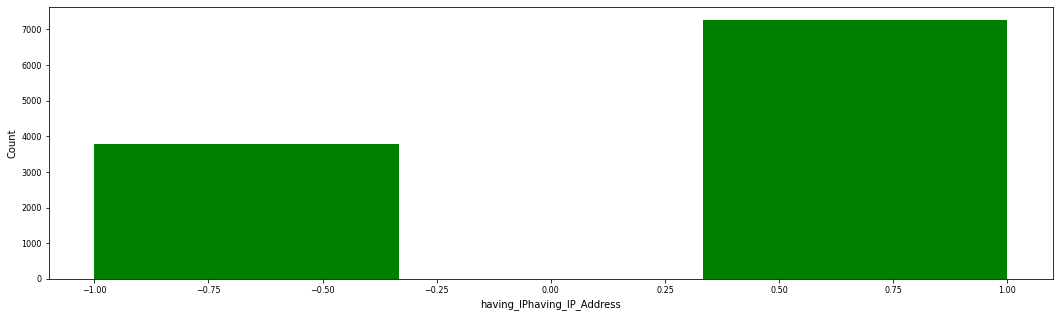

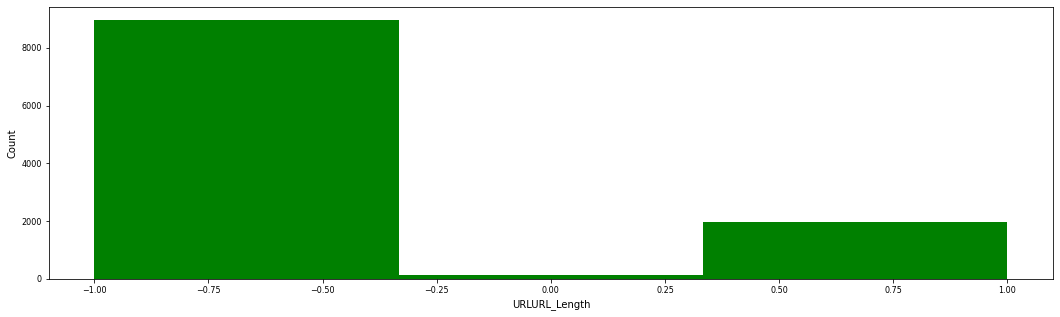

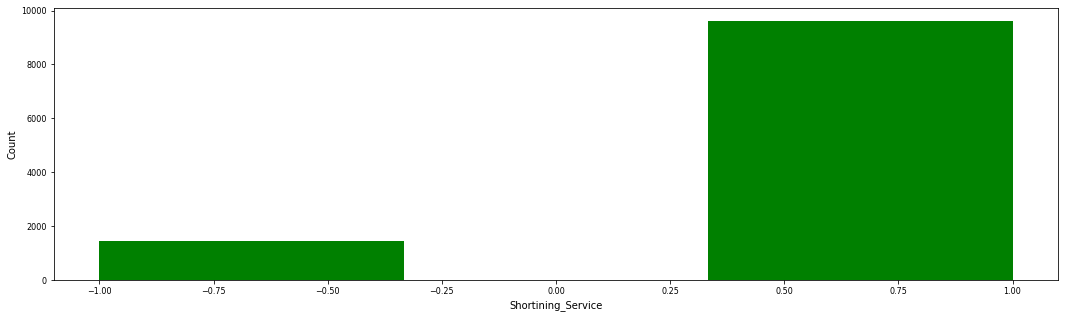

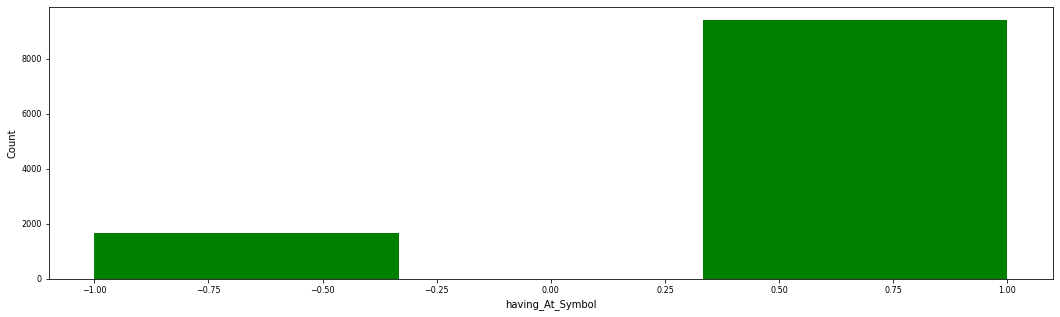

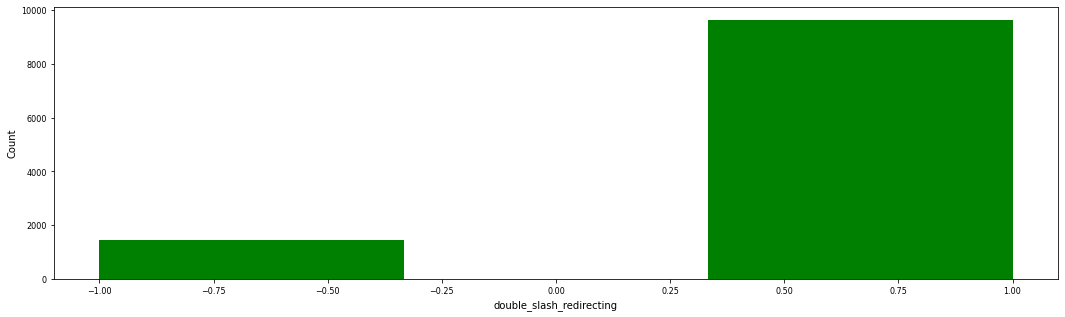

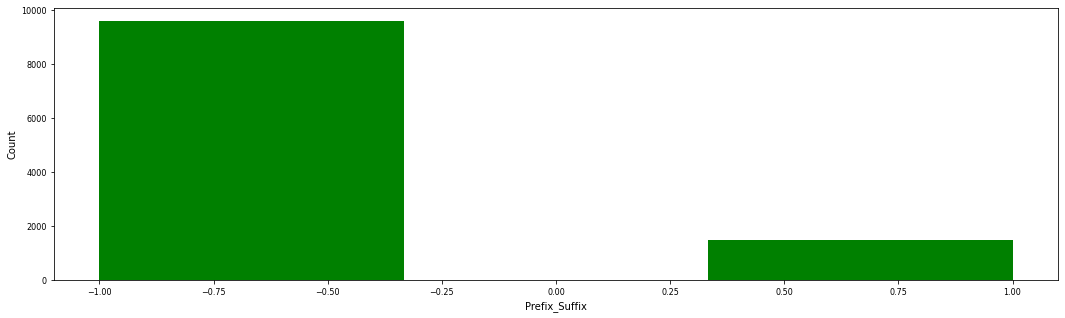

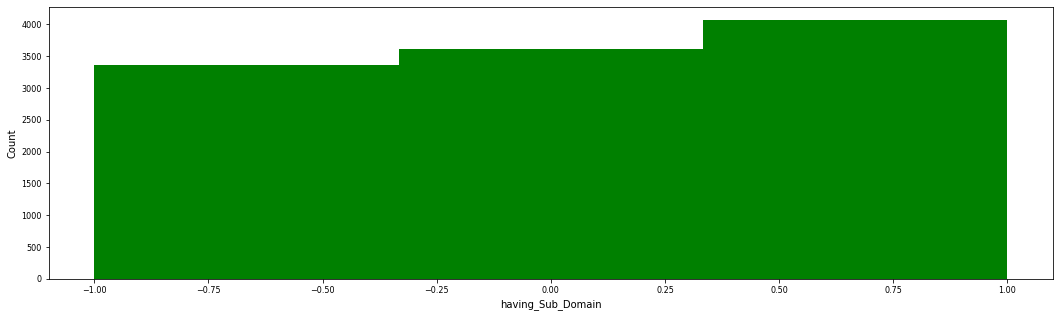

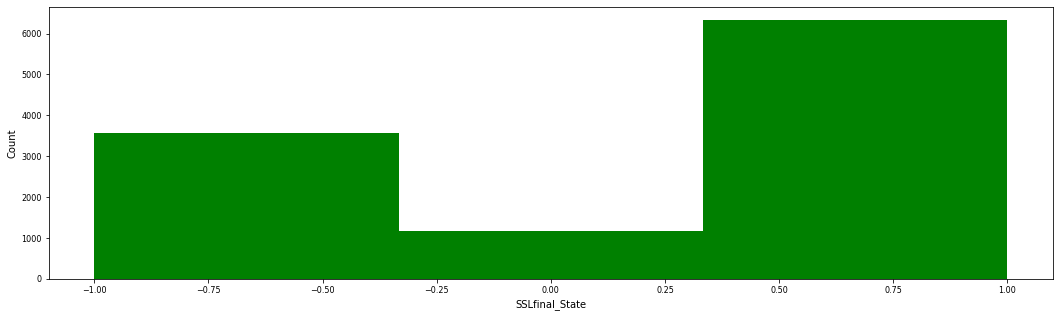

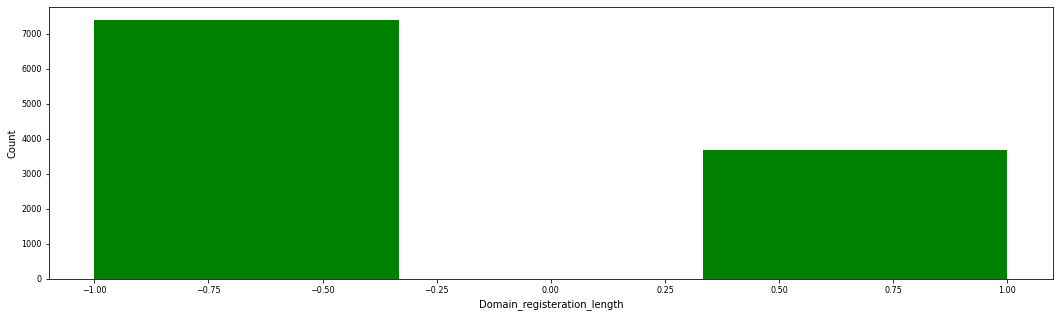

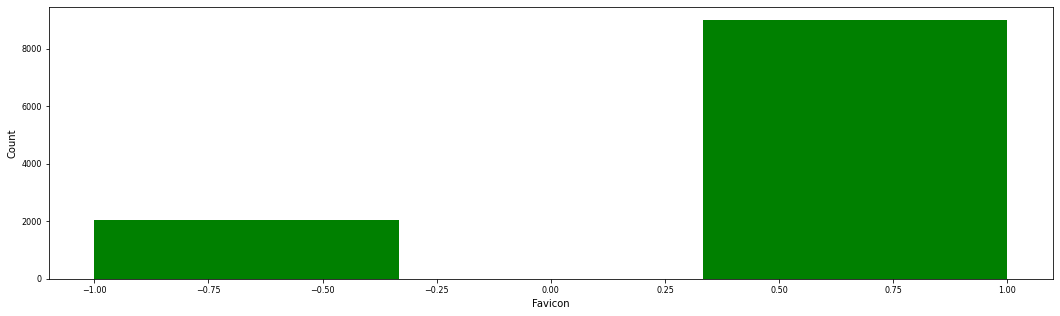

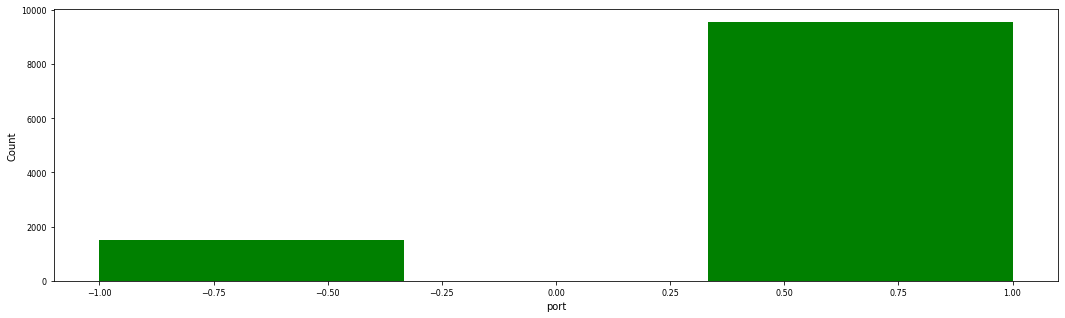

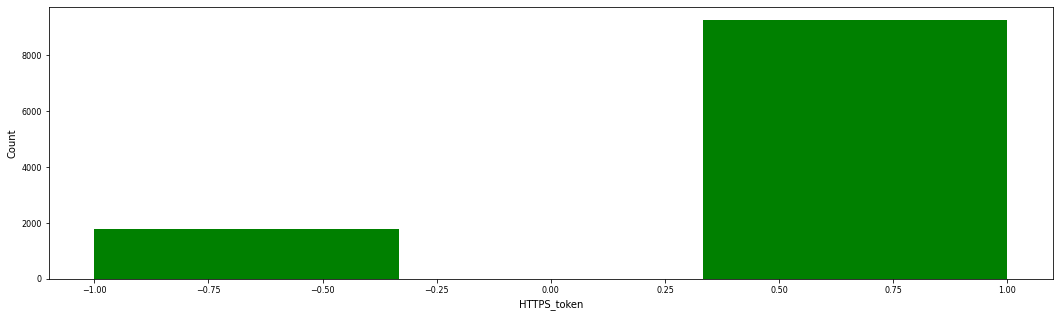

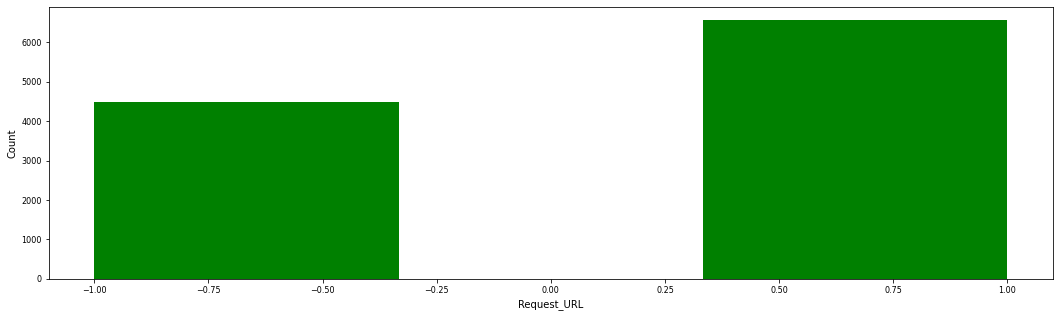

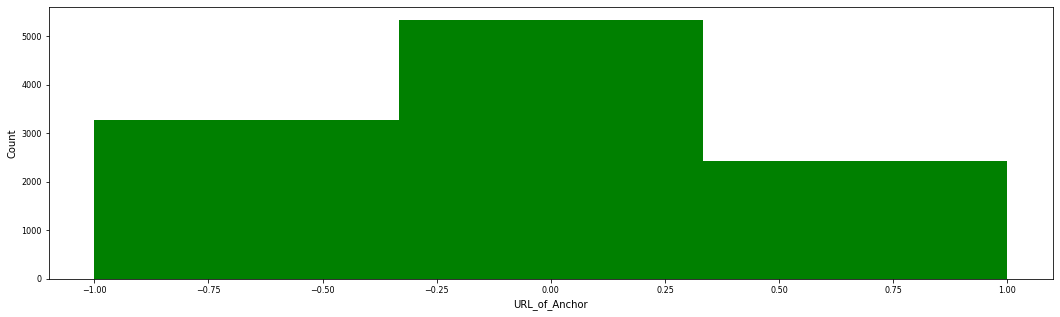

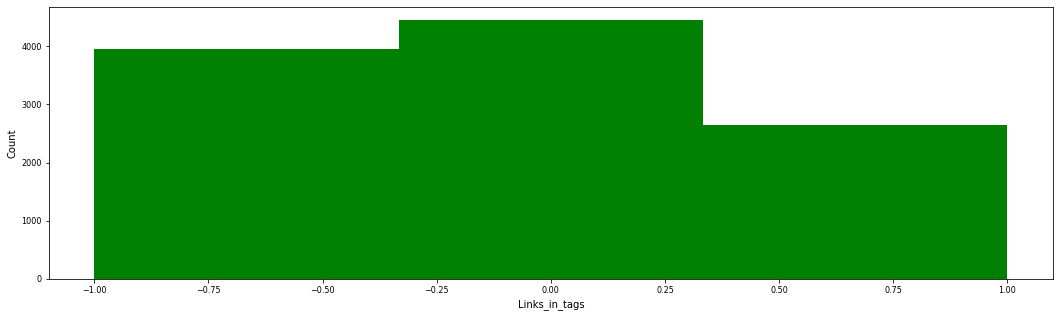

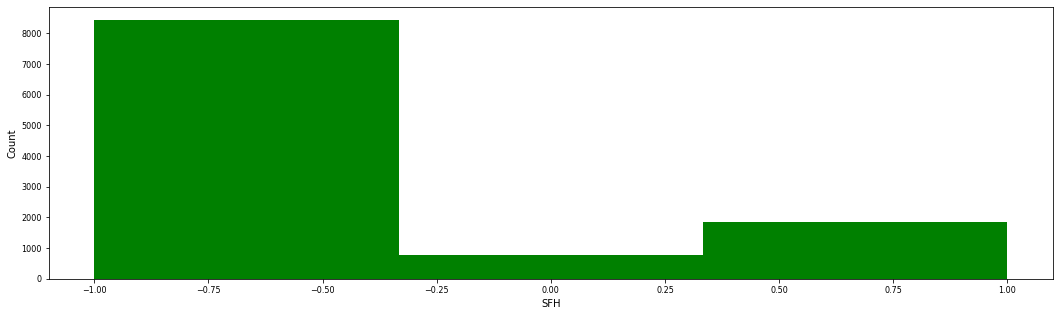

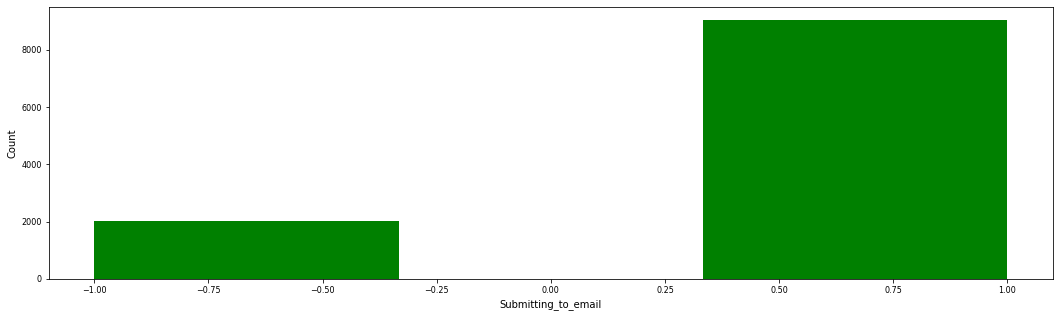

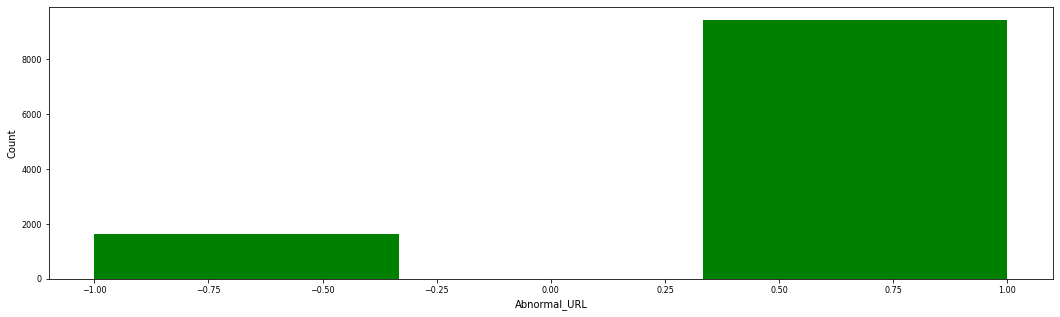

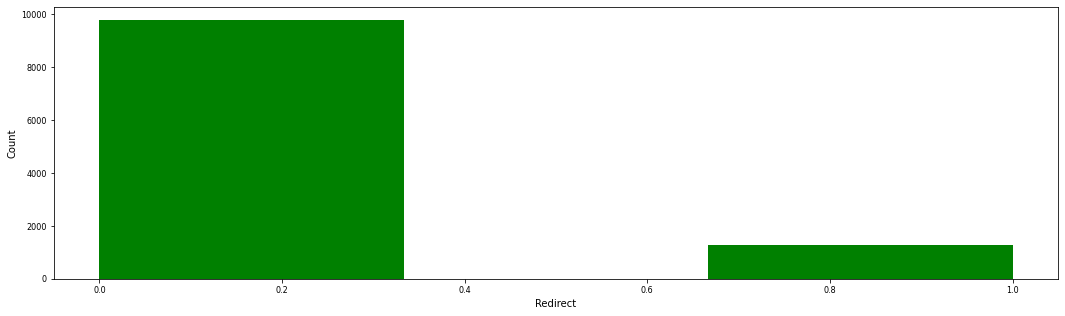

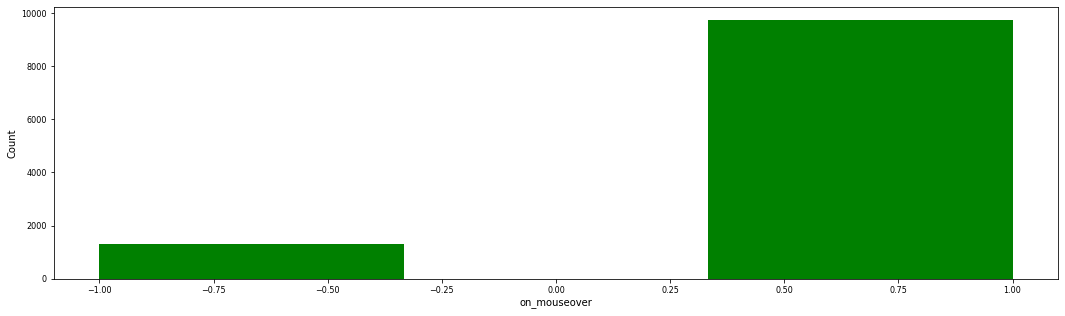

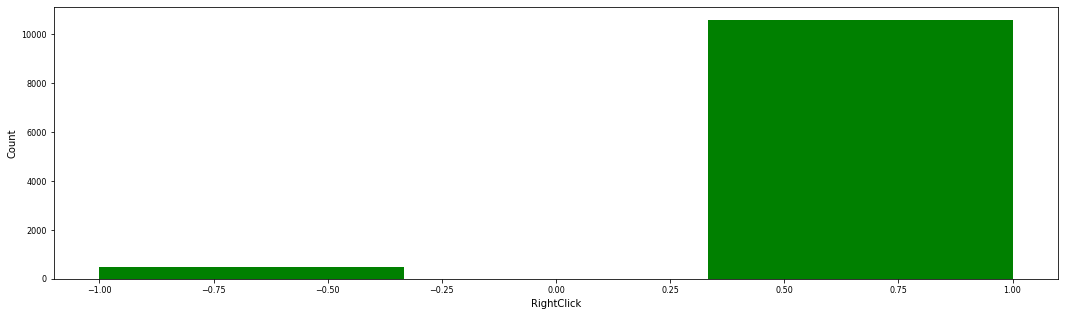

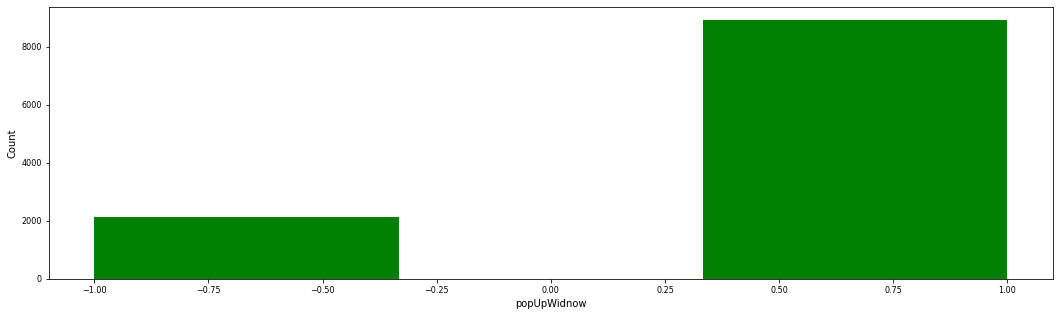

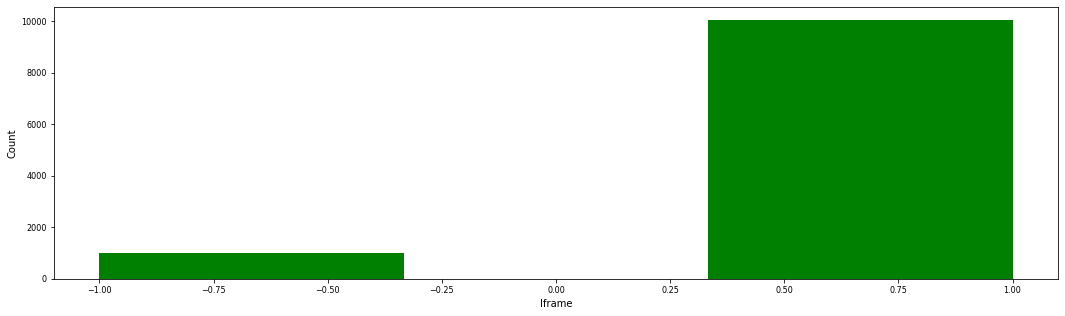

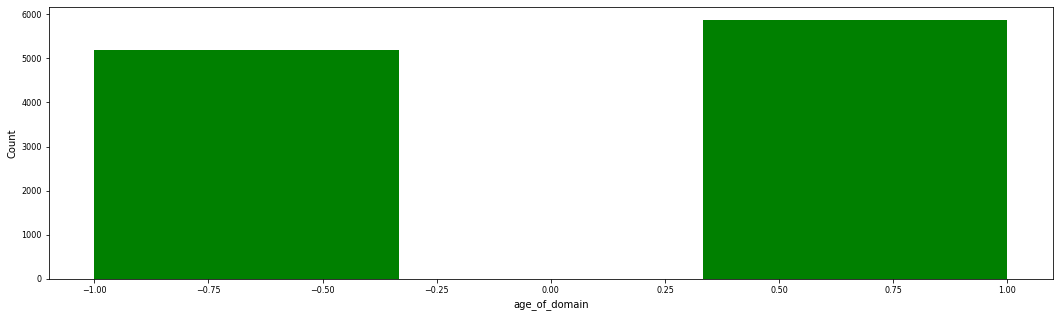

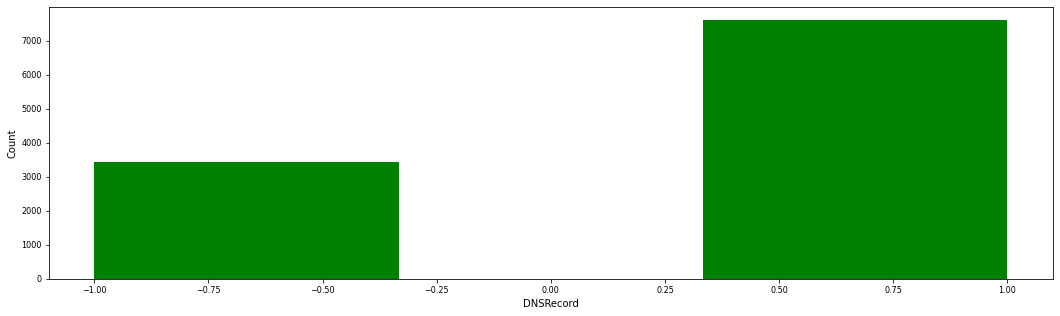

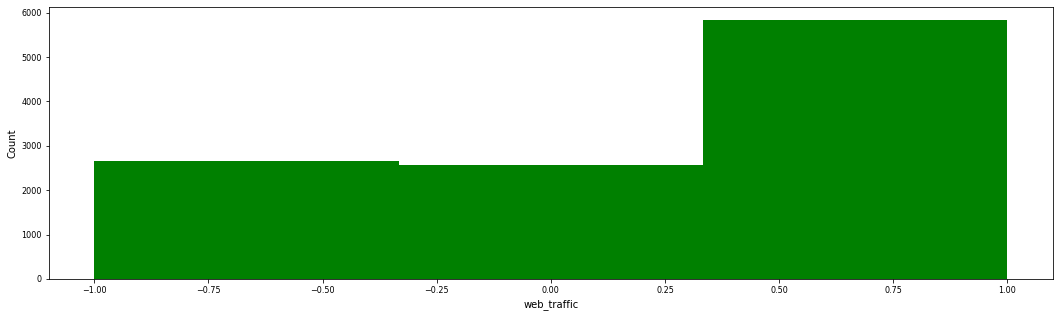

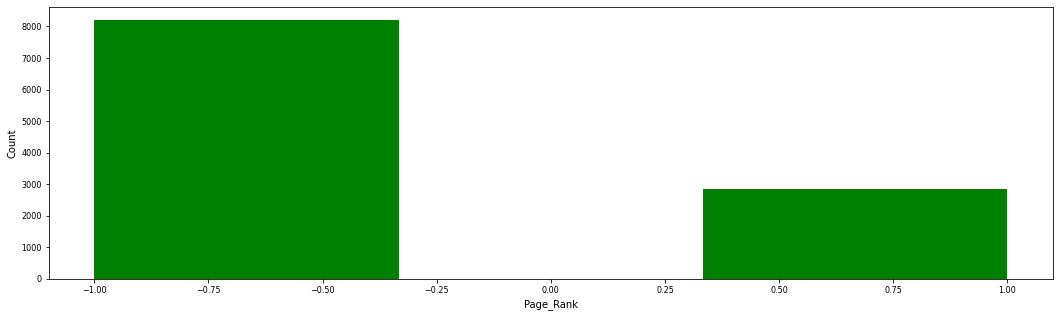

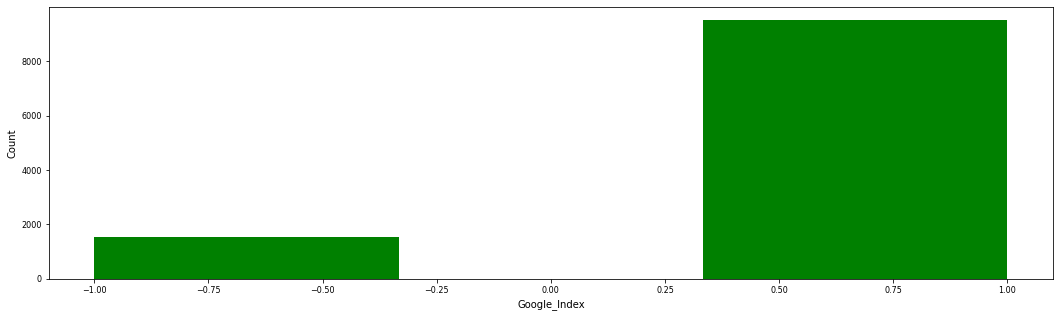

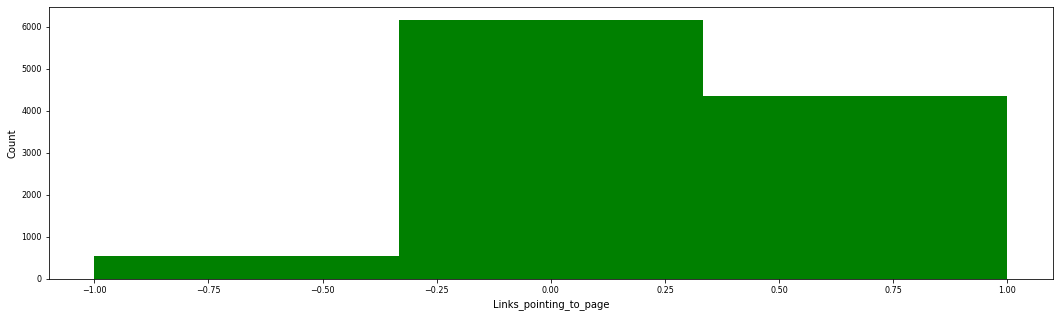

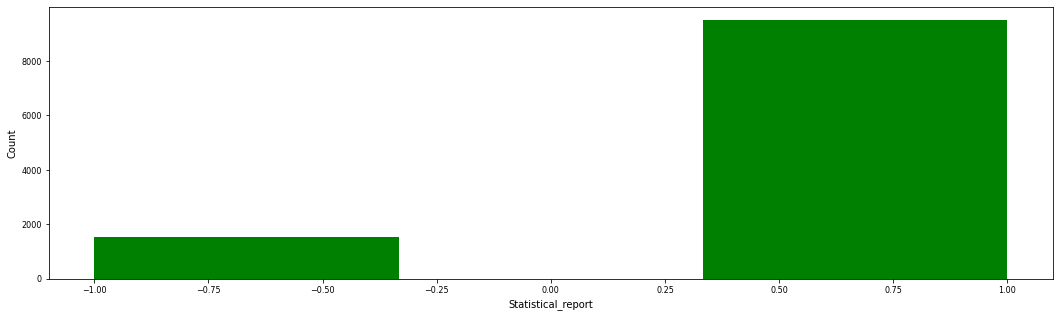

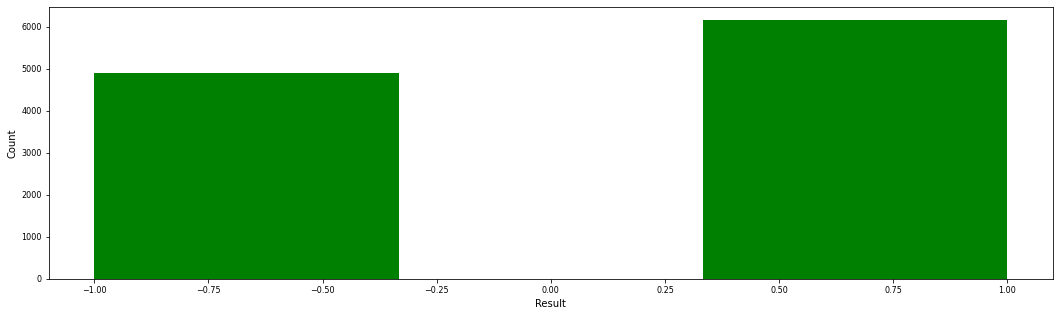

In [15]:
cols=['having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result']
for col in cols:
    plt.figure(figsize=(18,5))
    plt.hist(df[col],bins=3,color = 'green',density=False)
    plt.xlabel(col,fontsize=10)
    plt.ylabel('Count',fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

#### Heatmap

In [16]:
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [17]:
corr = df.corr()
corr

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,0.060979,0.363534,0.029773,0.099847,0.006212,-0.010962,0.077989,0.336549,-0.321181,0.084059,0.042881,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,0.000323,-0.089383,0.246348,-0.023396,0.052869,0.414196,-0.014457,-0.106761,0.046832,-0.045103,-0.013613,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,0.002201,0.757838,-0.037235,0.000561,-0.133379,-0.022723,0.049328,0.739290,-0.534530,0.062383,0.038118,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,0.364891,0.104561,0.027909,0.057914,-0.070861,-0.008672,0.370123,0.203945,-0.028160,0.279697,0.219503,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,0.025060,0.760799,-0.026368,-0.005036,-0.125583,-0.041672,0.031898,0.723724,-0.591478,0.086635,0.025863,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,-0.022546,-0.070153,0.098675,0.348871,0.100254,0.001326,-0.045000,-0.077620,0.016271,0.012578,-0.024868,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,0.004863,-0.037239,0.104857,0.229491,0.093646,0.096089,0.008830,-0.034908,0.031206,-0.018082,0.018230,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,0.027473,-0.029941,0.193054,0.535786,0.176825,0.171402,0.008062,-0.046245,-0.021070,0.023586,0.015854,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,0.022478,0.059161,-0.609970,-0.160257,-0.101084,-0.136422,0.039260,0.058109,-0.016300,0.023784,0.023520,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,0.803834,0.049483,-0.004620,0.037698,-0.100341,-0.012279,0.668317,0.071848,-0.015621,0.706179,0.414382,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


<AxesSubplot:>

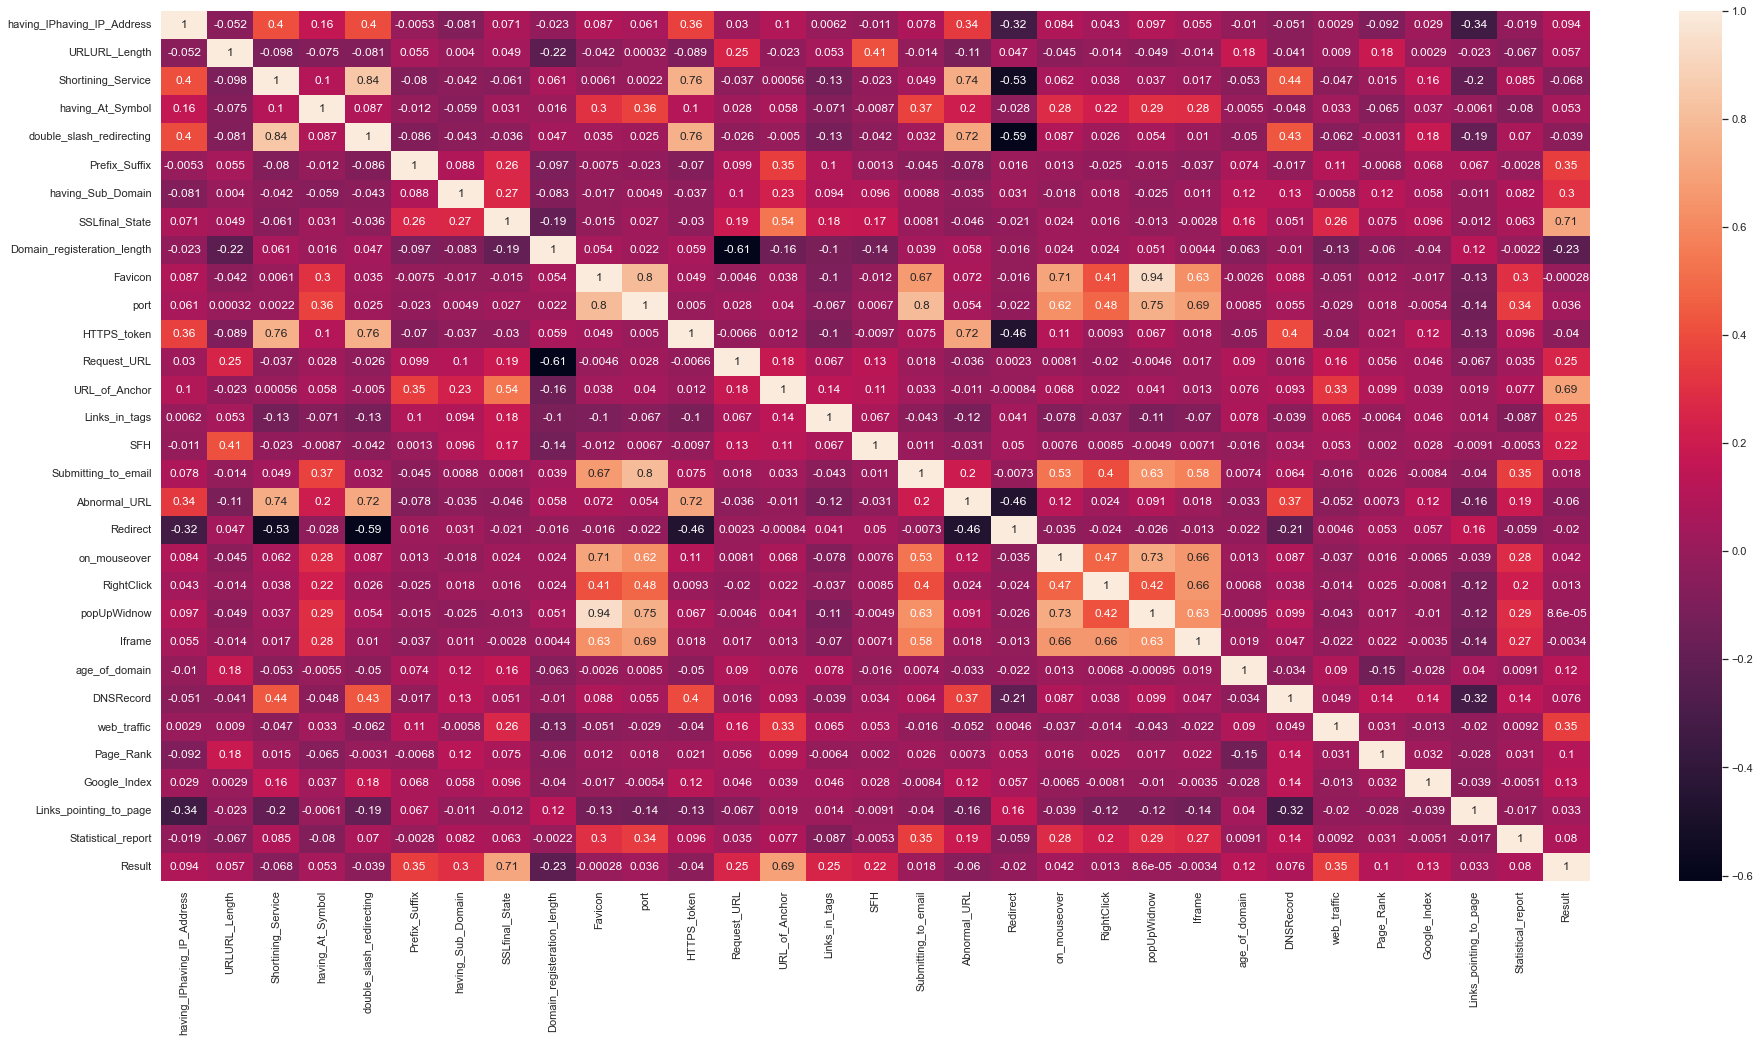

In [18]:
sns.set(rc={'figure.figsize':(32,16)})
sns.heatmap(corr, annot = True)

##### From the above heatmap we can infer Strong correlation between the atrributes:  

In [19]:
corr[corr<1].unstack().sort_values(ascending = False).drop_duplicates().head(20)

popUpWidnow               Favicon                     0.939633
Shortining_Service        double_slash_redirecting    0.842796
Favicon                   port                        0.803834
Submitting_to_email       port                        0.799088
double_slash_redirecting  HTTPS_token                 0.760799
HTTPS_token               Shortining_Service          0.757838
popUpWidnow               port                        0.748517
Abnormal_URL              Shortining_Service          0.739290
popUpWidnow               on_mouseover                0.733629
double_slash_redirecting  Abnormal_URL                0.723724
HTTPS_token               Abnormal_URL                0.716287
SSLfinal_State            Result                      0.714741
Favicon                   on_mouseover                0.706179
Result                    URL_of_Anchor               0.692935
Iframe                    port                        0.687044
Favicon                   Submitting_to_email         0

### Determine the number of samples present in the data, unique elements in all the features. 

In [20]:
print("Training Data has ", df.shape[0],"Rows and ",df.shape[1], "Columns", )


Training Data has  11055 Rows and  31 Columns


In [21]:
# display distinct value for each feature
for col_name in df.columns:
 print('The No of unique values in {' +col_name+ '} are: ', df[col_name].nunique() , ' Unique Values are: ', df[col_name].unique())
 #print(df[col_name].unique())


The No of unique values in {having_IPhaving_IP_Address} are:  2  Unique Values are:  [-1  1]
The No of unique values in {URLURL_Length} are:  3  Unique Values are:  [ 1  0 -1]
The No of unique values in {Shortining_Service} are:  2  Unique Values are:  [ 1 -1]
The No of unique values in {having_At_Symbol} are:  2  Unique Values are:  [ 1 -1]
The No of unique values in {double_slash_redirecting} are:  2  Unique Values are:  [-1  1]
The No of unique values in {Prefix_Suffix} are:  2  Unique Values are:  [-1  1]
The No of unique values in {having_Sub_Domain} are:  3  Unique Values are:  [-1  0  1]
The No of unique values in {SSLfinal_State} are:  3  Unique Values are:  [-1  1  0]
The No of unique values in {Domain_registeration_length} are:  2  Unique Values are:  [-1  1]
The No of unique values in {Favicon} are:  2  Unique Values are:  [ 1 -1]
The No of unique values in {port} are:  2  Unique Values are:  [ 1 -1]
The No of unique values in {HTTPS_token} are:  2  Unique Values are:  [-1  

#### Check if there is any null value in any features. 


In [22]:
df.isnull().sum().sum()


0

In [23]:
NAs= pd.concat([df.isnull().sum()],axis=1,keys=['Count of NANs'])
NAs.sample(5)

,Count of NANs
SSLfinal_State,0
DNSRecord,0
having_At_Symbol,0
Prefix_Suffix,0
Shortining_Service,0


In [24]:
NAs[NAs.sum(axis=1)>0]

,Count of NANs


##### It is good that there is no missing values or no null values


##### Now let us have a look at the data type of all the variables present in the training dataset


In [25]:
# Now let us have a look at the data type of all the variables present in the training dataset
dtype_data=df.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,31


#### Code to replace missing values in any future dataset for categorical columns with mode

In [26]:
for column in df.columns:
    mode = df[column].mode()
    df[column] = df[column].fillna(mode)

#### Check and remove duplicate Values

In [44]:
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1


In [45]:
# Selecting duplicate rows except first occurrence based on all columns
duplicate = df[df.duplicated()]
duplicate

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
180,1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1
203,1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,-1,1,1,-1,1,0,1,1
323,1,-1,1,1,1,-1,1,1,-1,1,1,1,1,1,0,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,1
364,1,-1,1,1,1,-1,0,1,-1,1,1,1,1,0,0,-1,1,1,0,1,1,1,1,1,-1,1,-1,1,1,1,1
381,1,-1,1,1,1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,1,0,1,1,1,1,1,-1,1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,-1,-1,1,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1,-1,-1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1


##### So there are 5206 duplicate values which needs to be removed

In [46]:
# dropping duplicate values
df.drop_duplicates(keep='first',inplace=True)
df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11037,1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,0,-1,1,0,1,-1
11045,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,1
11048,1,-1,1,1,1,-1,-1,1,1,1,1,1,-1,0,0,-1,1,1,0,1,1,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,1,-1,-1,0,-1,-1,1,1,1,1,1,1,1,-1,1,1,-1,1,1,1,-1


#### Remove Outlier if any

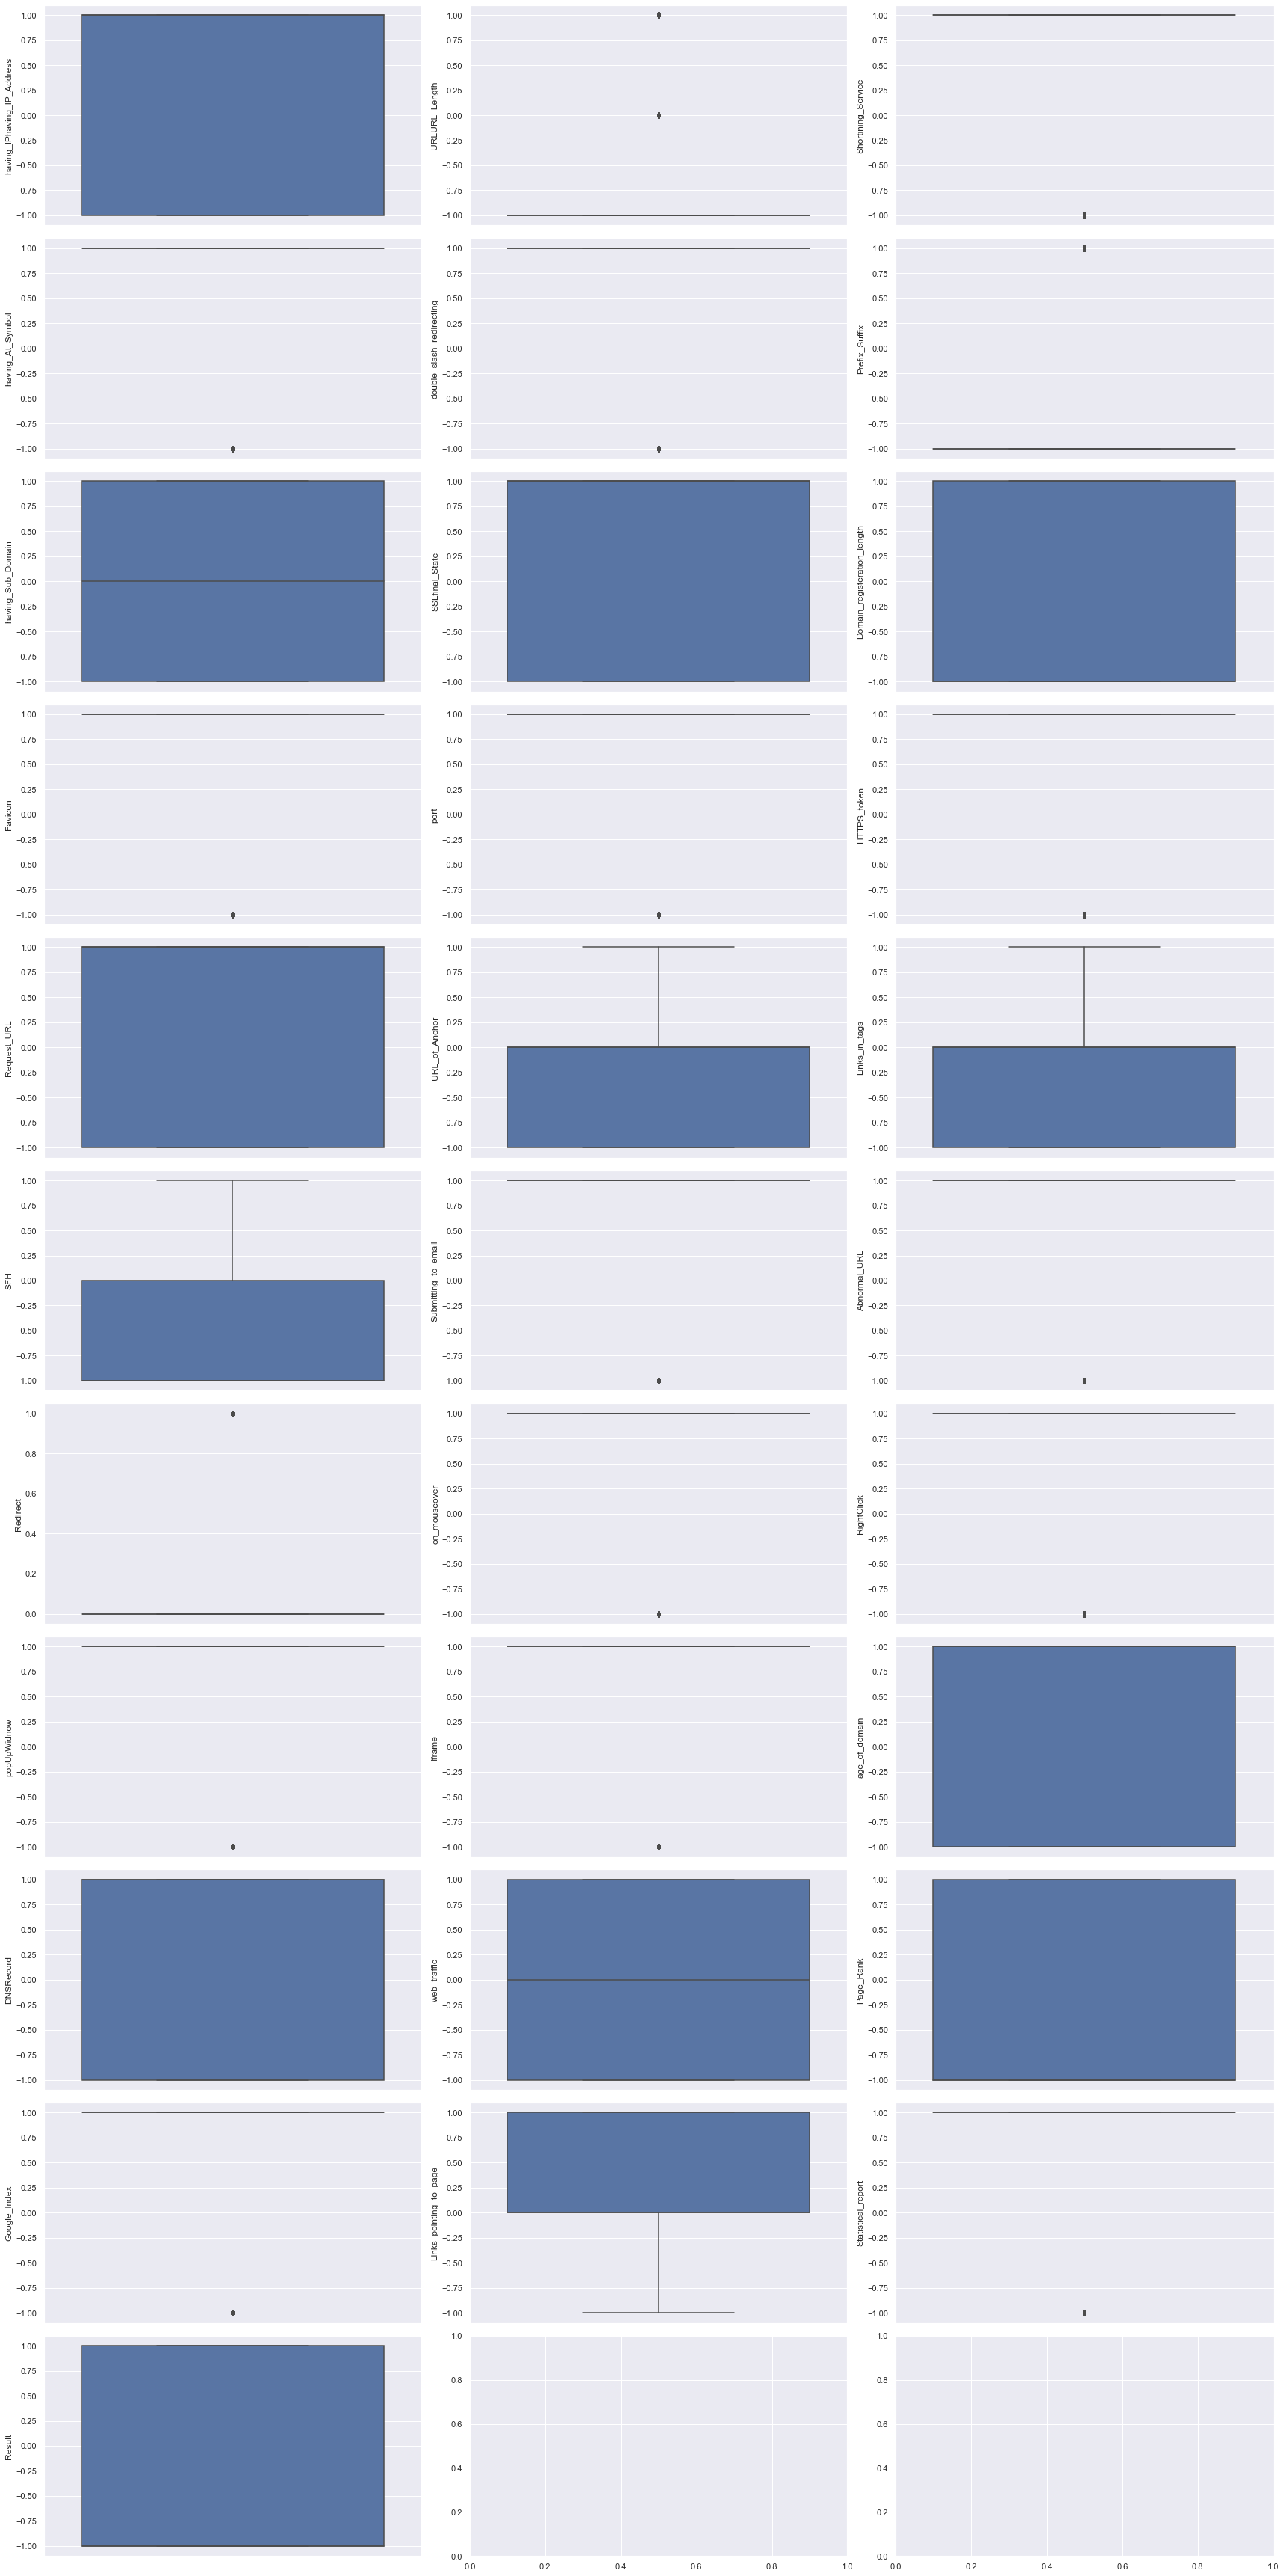

In [66]:
names = list(df.columns)
f, axes = plt.subplots(round(len(names)/3)+1, 3,figsize=(24, 48))  
y = 0
for name in names:
    i, j = divmod(y, 3)
    sns.boxplot(y=df[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()


##### There is no outlier in the dataset

In [87]:
names = list(df.columns)
for name in names:
    # IQR
    Q1 = np.percentile(df[name], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df[name], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    # Upper bound
    upperbound = np.where(df[name] >= (Q3+1.5*IQR))
    # Lower bound
    lowerbound = np.where(df[name] <= (Q1-1.5*IQR))
    ''' Removing the Outliers '''
    if len(upperbound)>1:
        df_out.drop(upper[0], inplace = True)
    if len(lowerbound)>1:
        df_out.drop(lower[0], inplace = True)

#### Correlation of features and feature selection:
##### Find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

In [26]:
correlated_df=corr[corr<1].unstack().sort_values(ascending = False).drop_duplicates().head(20)
correlated_df

popUpWidnow               Favicon                     0.939633
Shortining_Service        double_slash_redirecting    0.842796
Favicon                   port                        0.803834
Submitting_to_email       port                        0.799088
double_slash_redirecting  HTTPS_token                 0.760799
HTTPS_token               Shortining_Service          0.757838
popUpWidnow               port                        0.748517
Abnormal_URL              Shortining_Service          0.739290
popUpWidnow               on_mouseover                0.733629
double_slash_redirecting  Abnormal_URL                0.723724
HTTPS_token               Abnormal_URL                0.716287
SSLfinal_State            Result                      0.714741
Favicon                   on_mouseover                0.706179
Result                    URL_of_Anchor               0.692935
Iframe                    port                        0.687044
Favicon                   Submitting_to_email         0

In [27]:
corr_threshold=.8
correlated_df[correlated_df>corr_threshold]

popUpWidnow         Favicon                     0.939633
Shortining_Service  double_slash_redirecting    0.842796
Favicon             port                        0.803834
dtype: float64

#### It seems that due to strong correlation with Favicon  we can remove popUpWidnow. However will not remove any column now.

##### Check columns with 0 std dev.These 0 std dev features are constant.Since these features don't vary, it will have no effect on the model performance

In [91]:
cols_to_drop=[]
for each_col in df.drop(['Result'],axis=1).columns:
    if df[each_col].dtypes !='O': # not an object col
        if df[each_col].std() == 0.00:
            stats= each_col + ' { ' \
            ' std : ' + str(df[each_col].std()) + \
            ' Min : ' + str(df[each_col].min()) + \
            ' Max : ' + str(df[each_col].max()) + " } "
            print(stats)
            cols_to_drop.append(each_col)
print('Number of features with 0 std : {}'.format(len(cols_to_drop)))

Number of features with 0 std : 0


#### Encoding like LabelEncoding, One hot encoding not applicable as the dataset does not have any categorical attribute

##### Standardization & Normalization
##### All the values in the dataset are either -1,0,1, so scaling like Min Max Scalar, Robust Scalar,Standard Scalar is also not applicable

#### PCA

In [92]:
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [102]:
# split data table into data X and class labels y

X = df.iloc[:,0:30].values
y = df.iloc[:,30].values

In [103]:
# We did not specify the number of components in the constructor. 
# Hence, all 30 of the features in the feature set will be returned for both the training and 
# test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA()
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [104]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the 
# principal components. 
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.16229804, 0.11443812, 0.10203687, 0.0671858 , 0.06106969,
       0.0560188 , 0.04255811, 0.03820977, 0.03532811, 0.03271733,
       0.03023573, 0.02768732, 0.02645797, 0.02473476, 0.02288508,
       0.02097777, 0.01994106, 0.01705505, 0.01557411, 0.01381939,
       0.01303067, 0.01147583, 0.00943692, 0.00867916, 0.0064517 ,
       0.0049197 , 0.00448683, 0.00428824, 0.0038861 , 0.00211594])

##### first 5 principal component is responsible for 16.22% + 11.44% + 10.2% + 6.7% + 6.1% = 50.66% variance in the dataset. 
##### Collectively we can say that only 50.66% percent of the classification information 
##### contained in the feature set is captured by the first 5 principal components.
##### Other 25 principal components also have almost equal influence varying from 5%,4%,3%,2%,1% and less than 1%.

##### Let us first try with all components

In [109]:
# Training and Making Predictions
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[557  58]
 [ 33 522]]
Accuracy :  0.9222222222222223


##### It can be seen from the output that with all feature, the random forest algorithm is able to correctly predict 1096 out of 1170 instances, resulting in 93.67% accuracy.

#### PCA with 10 principal components

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [111]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the 
# principal components. 
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.16229804, 0.11443812, 0.10203687, 0.0671858 , 0.06106967,
       0.05601877, 0.04255792, 0.03820968, 0.03532691, 0.03271592])

In [112]:
# Training and Making Predictions
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[557  58]
 [ 33 522]]
Accuracy :  0.9222222222222223


##### Decrease in accuracy can be seen with 10 principal components

#### PCA with 5 principal components

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [117]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the 
# principal components. 
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.16229804, 0.11443809, 0.10203686, 0.06718553, 0.06106601])

In [118]:
# Training and Making Predictions
classifier = LogisticRegression() 
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[558  57]
 [ 35 520]]
Accuracy :  0.9213675213675213


##### Accuracy dropped with 5 principal components

#### PCA with 15 principal components

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [120]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the 
# principal components. 
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.16229804, 0.11443812, 0.10203687, 0.0671858 , 0.06106969,
       0.0560188 , 0.04255811, 0.03820977, 0.03532811, 0.03271732,
       0.03023573, 0.02768732, 0.02645794, 0.02473474, 0.02288507])

In [121]:
# Training and Making Predictions
classifier = LogisticRegression()  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[556  59]
 [ 31 524]]
Accuracy :  0.9230769230769231


##### Accuracy still decreased with 15 principal components compared with all attributes together

In [122]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
classifier = LogisticRegression()
pipe = Pipeline(steps=[("pca", pca), ("classifier", classifier)])


In [123]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.916):
{'pca__n_components': 26}


##### So if we use 26 principal components then the accuracy seems best

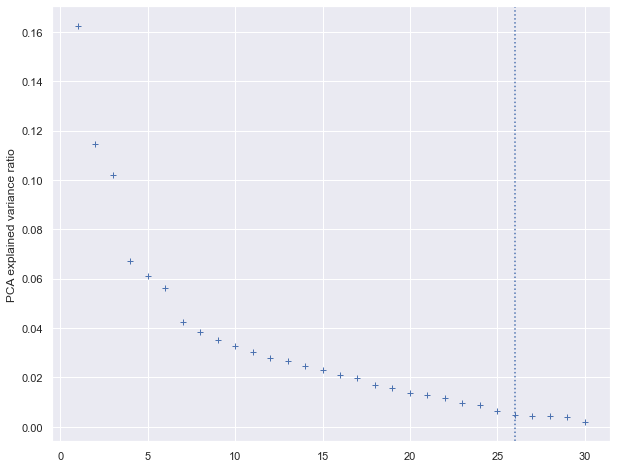

In [124]:
pca.fit(X_train)
fig, (ax0) = plt.subplots(nrows=1, sharex=True, figsize=(10, 8))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)

#### PCA with 26 principal components

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [126]:
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the 
# principal components. 
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.16229804, 0.11443812, 0.10203687, 0.0671858 , 0.06106969,
       0.0560188 , 0.04255811, 0.03820977, 0.03532811, 0.03271733,
       0.03023573, 0.02768732, 0.02645797, 0.02473476, 0.02288508,
       0.02097777, 0.01994106, 0.01705505, 0.01557411, 0.01381939,
       0.01303067, 0.01147583, 0.00943692, 0.00867916, 0.0064517 ,
       0.0049197 ])

In [127]:
# Training and Making Predictions
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[570  45]
 [ 27 528]]
Accuracy :  0.9384615384615385


##### Accuracy increased with 26 principal components compared with all components

In [128]:
n_component=range(1,30)
n_component

range(1, 30)

In [129]:
for n_component in range(1,31):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
    pca = PCA(n_components=n_component)
    X_train = pca.fit_transform(X_train)  
    X_test = pca.transform(X_test) 
    # Training and Making Predictions
    classifier = LogisticRegression() 
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)  

    cm = confusion_matrix(y_test, y_pred)  
    print(cm)  
    print('Accuracy for pca no of component: ' + str(n_component) + " is ",metrics.accuracy_score(y_test, y_pred))

[[487 128]
 [433 122]]
Accuracy for pca no of component: 1 is  0.5205128205128206
[[481 134]
 [322 233]]
Accuracy for pca no of component: 2 is  0.6102564102564103
[[465 150]
 [126 429]]
Accuracy for pca no of component: 3 is  0.764102564102564
[[489 126]
 [116 439]]
Accuracy for pca no of component: 4 is  0.7931623931623931
[[558  57]
 [ 35 520]]
Accuracy for pca no of component: 5 is  0.9213675213675213
[[555  60]
 [ 32 523]]
Accuracy for pca no of component: 6 is  0.9213675213675213
[[555  60]
 [ 32 523]]
Accuracy for pca no of component: 7 is  0.9213675213675213
[[555  60]
 [ 32 523]]
Accuracy for pca no of component: 8 is  0.9213675213675213
[[556  59]
 [ 33 522]]
Accuracy for pca no of component: 9 is  0.9213675213675213
[[556  59]
 [ 33 522]]
Accuracy for pca no of component: 10 is  0.9213675213675213
[[556  59]
 [ 33 522]]
Accuracy for pca no of component: 11 is  0.9213675213675213
[[557  58]
 [ 31 524]]
Accuracy for pca no of component: 12 is  0.923931623931624
[[557  58]
 [ 3

##### It seems if we keep no of components as 20 & 26 then the accuracy is 93.84%.
##### Still we would go for 26 components as prescribed by gridsearch as True positive is better (570) if we use 26 components.

## Perform Logistic Regression


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 
# Training and Making Predictions
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[570  45]
 [ 27 528]]
Accuracy :  0.9384615384615385


#### Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

<h2>What Are ROC Curves?</h2>
<p>A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve or ROC curve.</p>
<p>It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.</p>
<p>The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.</p>
True Positive Rate = True Positives / (True Positives + False Negatives)
<p>The true positive rate is also referred to as sensitivity.</p>
Sensitivity = True Positives / (True Positives + False Negatives)
<P>The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives.
It is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.
<P>False Positive Rate = False Positives / (False Positives + True Negatives)
The false positive rate is also referred to as the inverted specificity where specificity is the total number of true negatives divided by the sum of the number of true negatives and false positives.
Specificity = True Negatives / (True Negatives + False Positives)
False Positive Rate = 1 - Specificity

The ROC curve is a useful tool for a few reasons:

The curves of different models can be compared directly in general or for different thresholds.
The area under the curve (AUC) can be used as a summary of the model skill.
The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.983


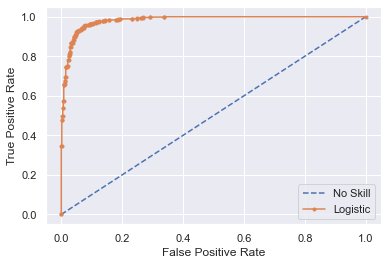

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 
# Training and Making Predictions
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#### As we can observe from the ROC curve the x-axis values are Smaller which indicate lower false positives and higher true negatives.
#### Also y-axis values are > .9 which shows higher true positives and lower false negatives.

<B>Below are the list of parameters to do hyper parameter tuning for logistic regression </B>

<B> Solver </B>
    <P>solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’] 

<B> Regularization (penalty)  </B>
    <P>penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’] 
Note: not all solvers support all regularization terms.

<B>The C parameter controls the penality strength, which can also be effective. </B>
   <P>C in [100, 10, 1.0, 0.1, 0.01]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=17)  
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [136]:
%%time
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.921704 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920265 (0.010267) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920265 (0.010267) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920265 (0.010267) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.920956 (0.009818) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920956 (0.009818) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920898 (0.009835) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.920841 (0.009962) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920841 (0.009962) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920841 (0.009962) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.921704 (0.009400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.921704 (0.009400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.921589 (0.009560) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.918423 (0.010829) wit

##### So 'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg' is providing best accuracy score of 92.17%
##### Adding l1 penalty as well

In [137]:
%%time
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.921704 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.920495 (0.010281) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.920265 (0.010267) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920265 (0.010267) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920265 (0.010267) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.920783 (0.009848) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.920956 (0.009818) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.920956 (0.009818) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.920898 (0.009835) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 

##### Still 'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg' is providing best accuracy score of 92.17%

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 
# Training and Making Predictions
classifier = LogisticRegression(C=0.1, penalty= 'l2', solver= 'newton-cg')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

[[570  45]
 [ 26 529]]
Accuracy :  0.9393162393162393


#### Validate the accuracy of data by the K-Fold cross-validation technique.



In [142]:
# import libraries for model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [145]:
kf= KFold(n_splits=11,shuffle=True,random_state=20)

In [146]:
%%time
scoring = {'accuracy': 'accuracy'}
# instantiate the lin reg model
classifier = LogisticRegression(C=0.1, penalty= 'l2', solver= 'newton-cg')
scores= cross_validate(estimator=classifier, X=X_train, y=y_train, cv=kf, scoring=scoring, return_train_score=True)

print('Score keys : \n', scores.keys())
print('Training accuracy : {}'.format(scores['train_accuracy'].mean()))
print('Testing accuracy : {}'.format(scores['test_accuracy'].mean()))

Score keys : 
 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy'])
Training accuracy : 0.9192776096010751
Testing accuracy : 0.9172905525846702
Wall time: 677 ms


#### The KFold cross validation result shows the training and testing scores are almost similar, no overfitting.

### Final Logistic Regression Model

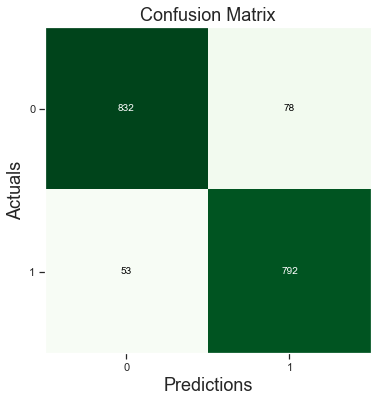

Accuracy :  0.9253561253561253


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)  
pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 
# Training and Making Predictions
lr = LogisticRegression(C=0.1, penalty= 'l2', solver= 'newton-cg')
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)  

cm = confusion_matrix(y_test, y_pred)  
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(8, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print('Accuracy : ' ,metrics.accuracy_score(y_test, y_pred))

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       910
           1       0.91      0.94      0.92       845

    accuracy                           0.93      1755
   macro avg       0.93      0.93      0.93      1755
weighted avg       0.93      0.93      0.93      1755

